Giwil Gidwani BE-A 24
Shubh Jain BE-A 33

# **Mini Project**

Mini project on classification: Consider a labeled dataset belonging to an application domain. Apply suitable data preprocessing steps such as handling of null values, data reduction, discretization. For prediction of class labels of given data instances, build classifier models using different techniques (minimum 3), analyze the confusion matrix and compare these models. Also apply cross validation while preparing the training and testing datasets.

# **About**

Given dataset consists of corresponding to various celestial bodies. In this assignment, we create 3 supervised ML models for classifying star type of a given celestial body. 

## **Star Type Classification**

Dataset consists of the following features:

Temperature -- K

L -- L/Lo (Relative Luminosity)

R -- R/Ro (Relative Radius)

AM -- Mv (Absolute Magnitude)

Color -- General Color of Spectrum

Spectral_Class -- O,B,A,F,G,K,M / SMASS - https://en.wikipedia.org/wiki/Asteroid_spectral_types

Type -- Red Dwarf, Brown Dwarf, White Dwarf, Main Sequence , Super Giants, Hyper Giants

TARGET:
Type

from 0 to 5

Red Dwarf - 0
Brown Dwarf - 1
White Dwarf - 2
Main Sequence - 3
Super Giants - 4
Hyper Giants - 5

MATH:

Lo = 3.828 x 10^26 Watts
(Avg Luminosity of Sun)

Ro = 6.9551 x 10^8 m
(Avg Radius of Sun)


## Importing Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('Stars.csv')
df.head()

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Temperature     240 non-null    int64  
 1   L               240 non-null    float64
 2   R               240 non-null    float64
 3   A_M             240 non-null    float64
 4   Color           240 non-null    object 
 5   Spectral_Class  240 non-null    object 
 6   Type            240 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB


## Data Visualization

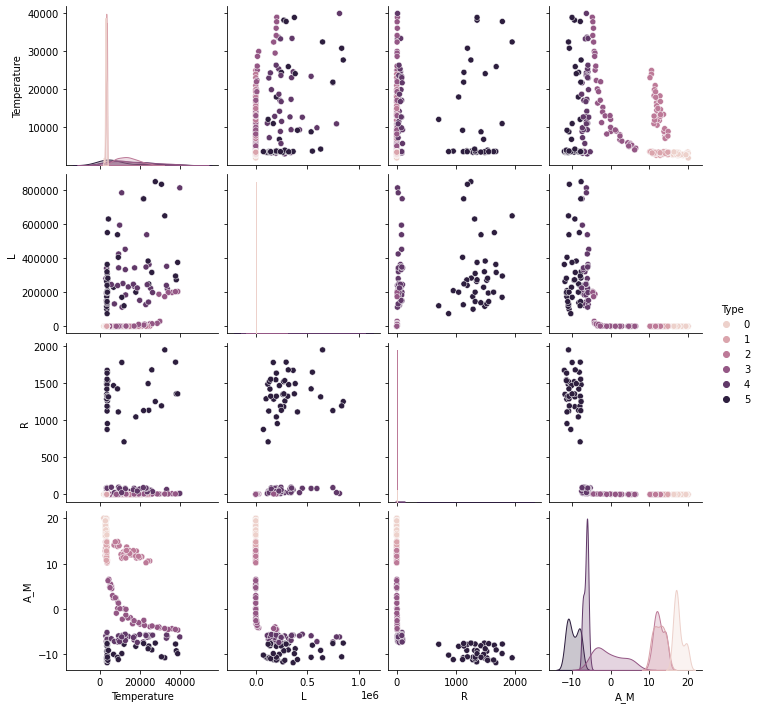

In [4]:
sns.pairplot(df,hue='Type')

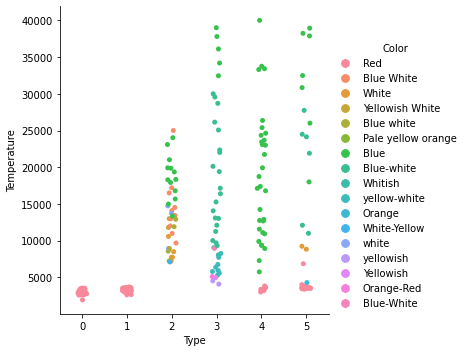

In [5]:
sns.catplot(data=df, x='Type', y='Temperature', hue='Color')

# type 0 and 1 have temperature less than 5000K while other categories are spread over various ranges
# type 3,4,5 can have higher temperature values
# type 2,3,4,5 have temperature >= 5000K

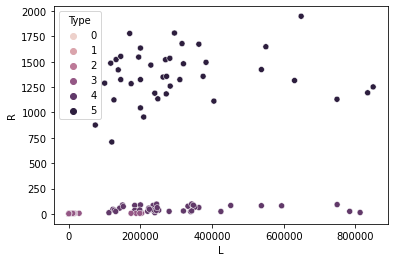

In [6]:
sns.scatterplot(data=df, x='L',y='R',hue='Type')

#type 5 stars have higher R value

## Preprocessing

In [7]:
df.describe()

,Temperature,L,R,A_M,Type
count,240.000000,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396,2.500000
std,9552.425037,179432.244940,517.155763,10.532512,1.711394
min,1939.000000,0.000080,0.008400,-11.920000,0.000000
25%,3344.250000,0.000865,0.102750,-6.232500,1.000000
50%,5776.000000,0.070500,0.762500,8.313000,2.500000
75%,15055.500000,198050.000000,42.750000,13.697500,4.000000
max,40000.000000,849420.000000,1948.500000,20.060000,5.000000


In [8]:
df.head()
# Rescale : Temperature, L, R, A_M
# Encode : Color, Spectral_Class

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0


In [9]:
df['Color'].unique()

array(['Red', 'Blue White', 'White', 'Yellowish White', 'Blue white',
       'Pale yellow orange', 'Blue', 'Blue-white', 'Whitish',
       'yellow-white', 'Orange', 'White-Yellow', 'white', 'yellowish',
       'Yellowish', 'Orange-Red', 'Blue-White'], dtype=object)

In [10]:
#removing typos

df['Color'] = df['Color'].apply(lambda x:x.lower())
df['Color'] = df['Color'].str.replace('-',' ')
df['Color'] = df['Color'].str.replace('ish','')
df['Color'] = df['Color'].str.replace('pale ','')
df['Color'] = df['Color'].str.replace('white yellow','yellow white')
df['Color'] = df['Color'].replace('whit','white')

df['Color'].unique()

array(['red', 'blue white', 'white', 'yellow white', 'yellow orange',
       'blue', 'orange', 'yellow', 'orange red'], dtype=object)

In [11]:
df['Spectral_Class'].unique()

array(['M', 'B', 'A', 'F', 'O', 'K', 'G'], dtype=object)

In [12]:
#encoding labels

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

df['Color'] = encoder.fit_transform(df['Color'])
df['Spectral_Class'] = encoder.fit_transform(df['Spectral_Class'])

df.head()

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,4,5,0
1,3042,0.000500,0.1542,16.60,4,5,0
2,2600,0.000300,0.1020,18.70,4,5,0
3,2800,0.000200,0.1600,16.65,4,5,0
4,1939,0.000138,0.1030,20.06,4,5,0


In [13]:
#rescaling non categorical features

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scalable = ['Temperature','L','R','A_M']
scaledColumns = pd.DataFrame(scaler.fit_transform(df[scalable]),columns=scalable)
scaledColumns.describe()

,Temperature,L,R,A_M
count,2.400000e+02,2.400000e+02,2.400000e+02,2.400000e+02
mean,1.850372e-17,-2.127927e-17,-1.850372e-17,-9.344377e-17
std,1.002090e+00,1.002090e+00,1.002090e+00,1.002090e+00
min,-8.978190e-01,-5.986236e-01,-4.595230e-01,-1.551051e+00
25%,-7.504023e-01,-5.986236e-01,-4.593402e-01,-1.009928e+00
50%,-4.953014e-01,-5.986232e-01,-4.580618e-01,3.739676e-01
75%,4.781574e-01,5.074424e-01,-3.767029e-01,8.862626e-01
max,3.094941e+00,4.145201e+00,3.316058e+00,1.491607e+00


In [14]:
df.drop(scalable,inplace=True,axis=1)
df = pd.concat([df,scaledColumns],axis=1)
df.head()

,Color,Spectral_Class,Type,Temperature,L,R,A_M
0,4,5,0,-0.779382,-0.598624,-0.459210,1.116745
1,4,5,0,-0.782110,-0.598624,-0.459241,1.162414
2,4,5,0,-0.828477,-0.598624,-0.459342,1.362213
3,4,5,0,-0.807496,-0.598624,-0.459229,1.167171
4,4,5,0,-0.897819,-0.598624,-0.459340,1.491607


## Splitting dataset for training and testing

In [15]:
X = df.drop('Type',axis=1)
y = df['Type']

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.45, random_state=69)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(132, 6)
(108, 6)
(132,)
(108,)


## KNN Classifier

In [17]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score

In [18]:
from sklearn.neighbors import KNeighborsClassifier

knnModel = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

knnModel= KNeighborsClassifier().fit(X_train,y_train.values.ravel())

In [19]:
cv_lr = cross_val_score(estimator = knnModel, X = X_train, y = y_train, cv = 10)
print("CV: ", cv_lr.mean())

CV:  0.870879120879121


In [20]:
#metrics and cross validation
y_pred= knnModel.predict(X_train)
print(classification_report(y_train,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       0.88      1.00      0.93        21
           2       0.88      1.00      0.94        22
           3       0.95      0.73      0.83        26
           4       0.87      0.95      0.91        21
           5       1.00      0.90      0.95        21

    accuracy                           0.92       132
   macro avg       0.93      0.93      0.93       132
weighted avg       0.93      0.92      0.92       132



In [21]:
y_test_pred = knnModel.predict(X_test)
print(classification_report(y_test,y_test_pred))
#for knn training data accuracy is 0.92 where as testing data accuracy is 0.94

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.95      1.00      0.97        19
           2       1.00      1.00      1.00        18
           3       0.83      0.71      0.77        14
           4       0.86      0.95      0.90        19
           5       1.00      0.95      0.97        19

    accuracy                           0.94       108
   macro avg       0.94      0.93      0.94       108
weighted avg       0.94      0.94      0.94       108



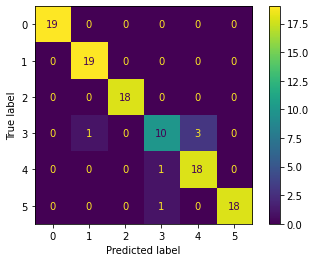

In [22]:
ConfusionMatrixDisplay.from_estimator(knnModel,X_test,y_test)

## Decision Tree Classifier

In [23]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=4)
tree.fit(X_train,y_train)


DecisionTreeClassifier(max_depth=4)

In [24]:
cv_lr = cross_val_score(estimator = tree, X = X_train, y = y_train, cv = 10)
print("CV: ", cv_lr.mean())

CV:  0.9923076923076923


In [25]:
y_train_pred = tree.predict(X_train)
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        22
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        21
           5       1.00      1.00      1.00        21

    accuracy                           1.00       132
   macro avg       1.00      1.00      1.00       132
weighted avg       1.00      1.00      1.00       132



In [26]:
y_test_pred = tree.predict(X_test)
print(classification_report(y_test,y_test_pred))

#for decision tree training accuracy is 1.00 where as testing accuracy is 0.99
#error found was in type 3 and 4 which can be reduced by increasing dataset size

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00        18
           3       0.82      1.00      0.90        14
           4       1.00      0.84      0.91        19
           5       1.00      1.00      1.00        19

    accuracy                           0.97       108
   macro avg       0.97      0.97      0.97       108
weighted avg       0.98      0.97      0.97       108



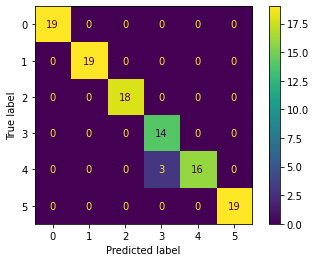

In [27]:
ConfusionMatrixDisplay.from_estimator(tree,X_test,y_test)

## Random Forest Classifier

In [28]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(criterion = 'entropy', max_features = 4, n_estimators = 800, random_state=69)
rf.fit(X_train, y_train.ravel())

RandomForestClassifier(criterion='entropy', max_features=4, n_estimators=800,
                       random_state=69)

In [29]:
cv_lr = cross_val_score(estimator = rf, X = X_train, y = y_train, cv = 10)
print("CV: ", cv_lr.mean())

CV:  1.0


In [30]:
y_train_pred = rf.predict(X_train)
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        22
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        21
           5       1.00      1.00      1.00        21

    accuracy                           1.00       132
   macro avg       1.00      1.00      1.00       132
weighted avg       1.00      1.00      1.00       132



In [31]:
y_test_pred = rf.predict(X_test)
print(classification_report(y_test,y_test_pred))
#for random forest training accuracy is 1.00 where as testing accuracy is 0.98

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00        18
           3       0.88      1.00      0.93        14
           4       1.00      0.89      0.94        19
           5       1.00      1.00      1.00        19

    accuracy                           0.98       108
   macro avg       0.98      0.98      0.98       108
weighted avg       0.98      0.98      0.98       108



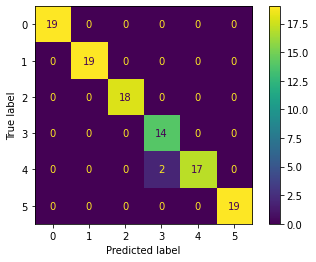

In [32]:
ConfusionMatrixDisplay.from_estimator(rf,X_test,y_test)

## Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=69,max_iter=10000)
lr.fit(X_train,y_train.ravel())

LogisticRegression(max_iter=10000, random_state=69)

In [34]:
cv_lr = cross_val_score(estimator = lr, X = X_train, y = y_train, cv = 10)
print("CV: ", cv_lr.mean())

CV:  0.9543956043956043


In [35]:
y_train_pred = lr.predict(X_train)
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        22
           3       0.96      0.92      0.94        26
           4       0.91      0.95      0.93        21
           5       1.00      1.00      1.00        21

    accuracy                           0.98       132
   macro avg       0.98      0.98      0.98       132
weighted avg       0.98      0.98      0.98       132



In [36]:
y_test_pred = lr.predict(X_test)
print(classification_report(y_test,y_test_pred))
#for random forest training accuracy is 0.98 where as testing accuracy is 0.96

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00        18
           3       0.86      0.86      0.86        14
           4       0.90      0.95      0.92        19
           5       1.00      0.95      0.97        19

    accuracy                           0.96       108
   macro avg       0.96      0.96      0.96       108
weighted avg       0.96      0.96      0.96       108



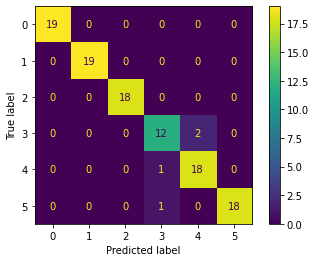

In [37]:
ConfusionMatrixDisplay.from_estimator(lr,X_test,y_test)

##Conclusion
Thus we have created classifiers for the given dataset and obtained the following results.

**Model**|**Precision**|**Recall**|**Accuracy**
:-----:|:-----:|:-----:|:-----:
KNN|0.94|0.94|0.94
Decision Tree|0.99|0.99|0.99
Random Forest|0.98|0.98|0.98
Logistic Regression|0.96|0.96|0.96